# 음주 여부에 따라 건강검진 수치 차이가 있을까?

# 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?

# 기본 설정

In [1]:
# 한글폰트 설정

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [2]:
# 라이브러리로드

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
plt.rc('font',family='NanumBarunGothic')

# 데이터 살펴보기

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 불러오기

In [6]:
df = pd.read_csv('/content/drive/MyDrive/data/NHIS_OPEN_GJ_2017.CSV', encoding = 'cp949')
df.shape

(1000000, 34)

## 데이터 미리보기

In [7]:
df.head()
# df.tail()
# df.sample()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


## 기본정보 보기

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [9]:
# 컬럼만 보기

df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [10]:
# 데이터 형식만 보기

df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)       float64
체중(5Kg 단위)      float64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부            float64
구강검진 수검여부         int64
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석              float64
데이터공개일자           int64
dtype: object

## 결측치 보기

In [11]:
df.isnull().sum() 
# df.isna().sum() 같은 기능

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

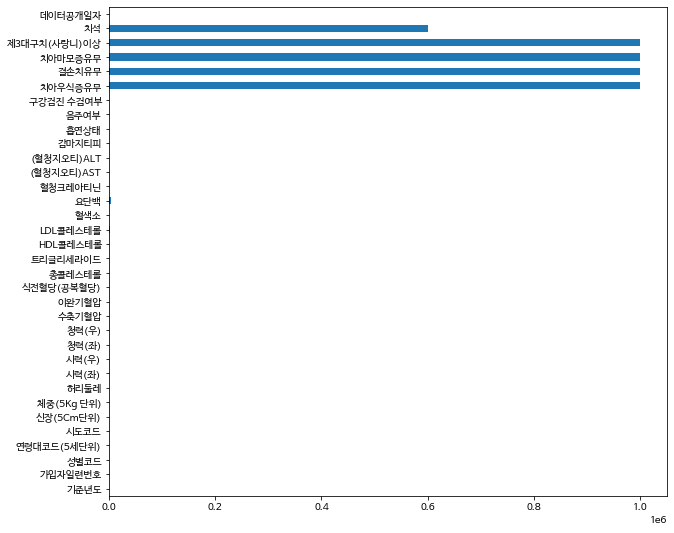

In [12]:
# 결측치 수 시각화

df.isnull().sum().plot.barh(figsize=(10,9))

## 데이터 요약하기

In [13]:
# ALT, AST 데이터 가져오기

df[["(혈청지오티)ALT","(혈청지오티)AST"]]

# ALT, AST 요약

df[["(혈청지오티)ALT","(혈청지오티)AST"]].info()

# ALT,AST 수치 요약

df[["(혈청지오티)ALT","(혈청지오티)AST"]].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   (혈청지오티)ALT  999956 non-null  float64
 1   (혈청지오티)AST  999958 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


,(혈청지오티)ALT,(혈청지오티)AST
count,999956.000000,999958.000000
mean,25.859343,26.075068
std,25.814268,24.437136
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,30.000000,28.000000
max,6710.000000,9999.000000


## value_counts로 값 집계

In [14]:
df["성별코드"].value_counts() # 남자 : 1 / 여자 : 2

1    531172
2    468828
Name: 성별코드, dtype: int64

In [15]:
df["흡연상태"].value_counts() # 1 : 흡연 x / 3 : 흡연 o / 2 : 금연

1.0    608587
3.0    215061
2.0    176192
Name: 흡연상태, dtype: int64

## groupby와 pivot_table 사용

### groupby

In [16]:
df.groupby(["성별코드"])["가입자일련번호"].count()

성별코드
1    531172
2    468828
Name: 가입자일련번호, dtype: int64

In [17]:
df.groupby(["성별코드","음주여부"])["가입자일련번호"].count()

성별코드  음주여부
1     0.0     175150
      1.0     355826
2     0.0     327579
      1.0     140920
Name: 가입자일련번호, dtype: int64

In [18]:
df.groupby(["성별코드","음주여부"])["감마지티피"].mean()

성별코드  음주여부
1     0.0     34.710544
      1.0     56.707919
2     0.0     22.660238
      1.0     25.115149
Name: 감마지티피, dtype: float64

In [19]:
df.groupby(["성별코드","음주여부"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   175139.0  34.710544  37.715218  1.0  18.0  25.0  38.0  999.0
     1.0   355819.0  56.707919  69.039084  1.0  24.0  37.0  63.0  999.0
2    0.0   327559.0  22.660238  25.181300  1.0  13.0  17.0  24.0  999.0
     1.0   140913.0  25.115149  35.870812  1.0  13.0  17.0  25.0  999.0

In [20]:
df.groupby(["성별코드","음주여부"])["감마지티피"].agg(["count","mean","median"])

count       mean  median
성별코드 음주여부                           
1    0.0   175139  34.710544    25.0
     1.0   355819  56.707919    37.0
2    0.0   327559  22.660238    17.0
     1.0   140913  25.115149    17.0

### pivot_table

In [21]:
df.pivot_table(index = "음주여부",values="가입자일련번호", aggfunc="count")

,가입자일련번호
음주여부,
0.0,502729
1.0,496746


In [22]:
# 음주여부에 따른 감마지티피의 평균

pd.pivot_table(df, index = "음주여부", values="감마지티피", aggfunc = ['mean','median']) # default -> 평균

,mean,median
,감마지티피,감마지티피
음주여부,,
0.0,26.858541,19.0
1.0,47.745678,30.0


In [23]:
pd.pivot_table(df, index = ["성별코드","음주여부"], values="감마지티피", aggfunc = "describe")

25%   50%   75%     count    max       mean  min        std
성별코드 음주여부                                                              
1    0.0   18.0  25.0  38.0  175139.0  999.0  34.710544  1.0  37.715218
     1.0   24.0  37.0  63.0  355819.0  999.0  56.707919  1.0  69.039084
2    0.0   13.0  17.0  24.0  327559.0  999.0  22.660238  1.0  25.181300
     1.0   13.0  17.0  25.0  140913.0  999.0  25.115149  1.0  35.870812

# 시각화

## 히스토그램

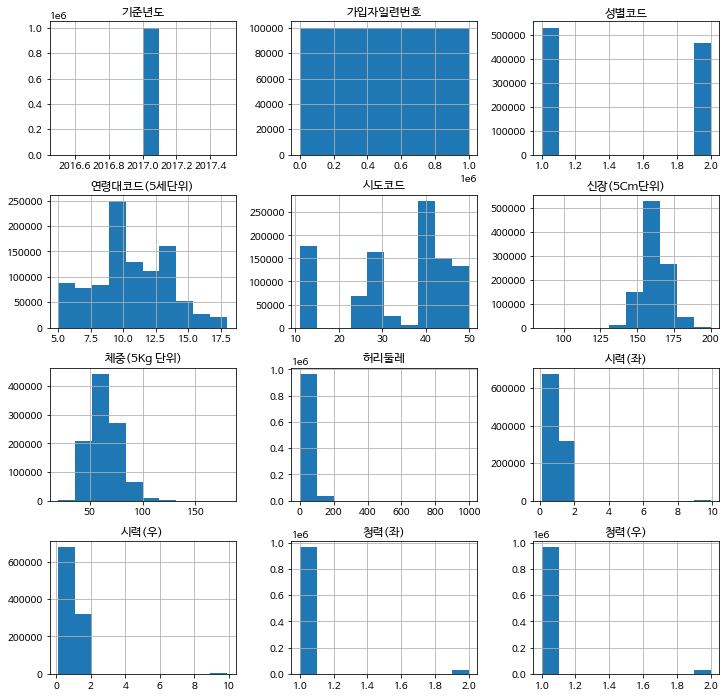

In [24]:
# 모든 데이터가 수치형이기 때문에 다 히스토그램으로 표현 가능

h = df.iloc[:,:12].hist(figsize = (12,12))

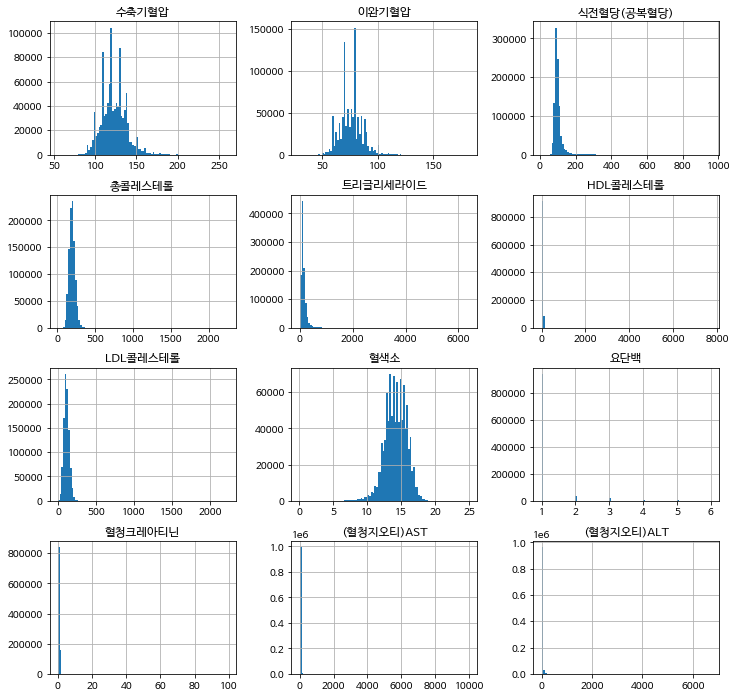

In [25]:
h = df.iloc[:,12:24].hist(figsize=(12,12), bins = 100)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


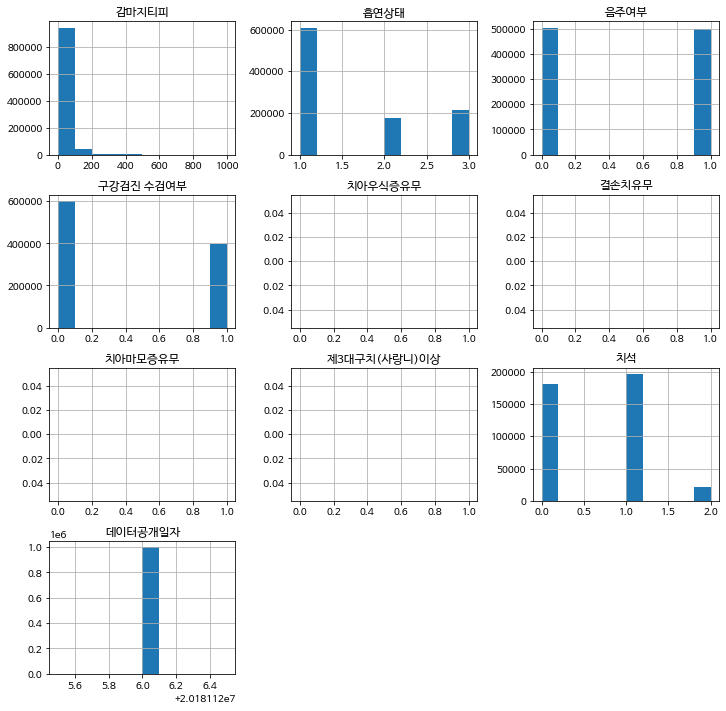

In [26]:
h = df.iloc[:,24:].hist(figsize = (12,12),bins=10)

## 샘플데이터 추출하기

In [27]:
df_sample = df.sample(1000,random_state = 1) # 랜덤값을 고정!!
df_sample.shape

(1000, 34)

## Seaborn 이용

### 범주형 데이터 시각화

#### countplot - 음주여부

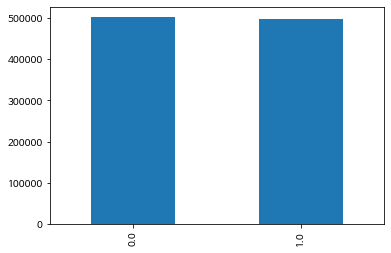

In [28]:
df["음주여부"].value_counts().plot.bar()

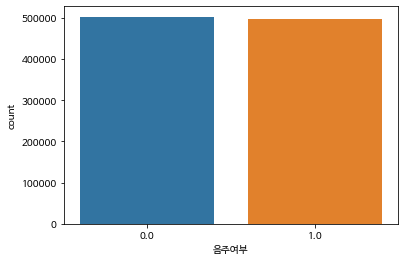

In [29]:
sns.countplot(x = "음주여부", data = df)

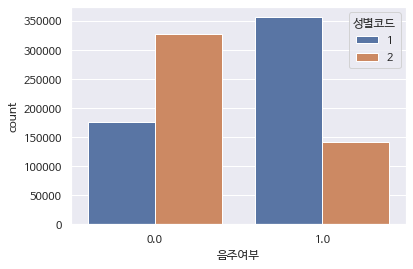

In [30]:
sns.set(font_scale = 1, font = 'NanumBarunGothic')
sns.countplot(data = df, x = "음주여부", hue = "성별코드")

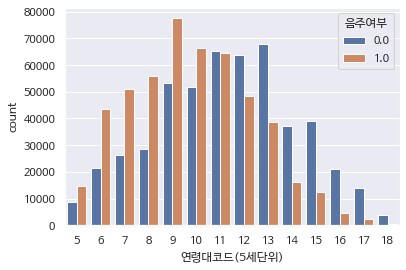

In [31]:
sns.countplot(data = df, x = "연령대코드(5세단위)", hue = "음주여부")

#### countplot - 키와 몸무게

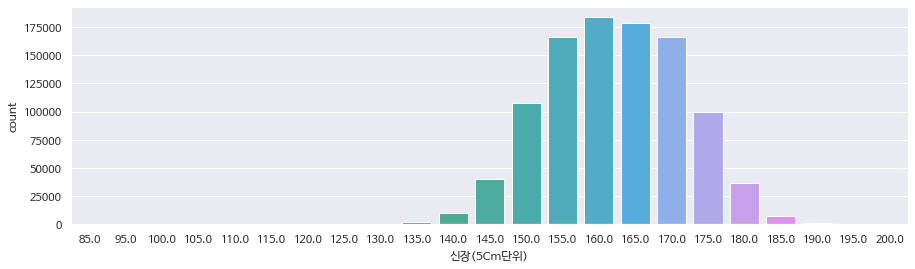

In [32]:
plt.figure(figsize = (15,4))
sns.countplot(data = df, x = "신장(5Cm단위)")

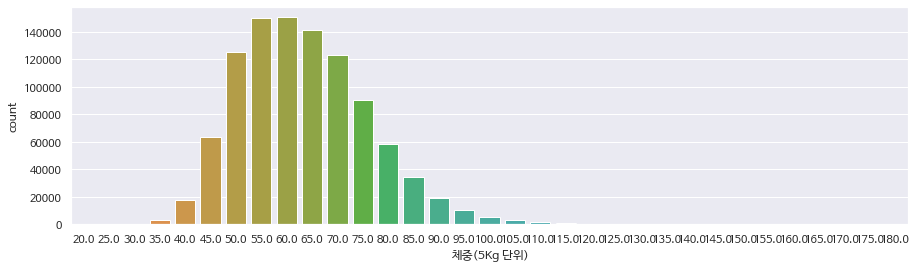

In [33]:
plt.figure(figsize = (15,4))
sns.countplot(data = df, x = "체중(5Kg 단위)")

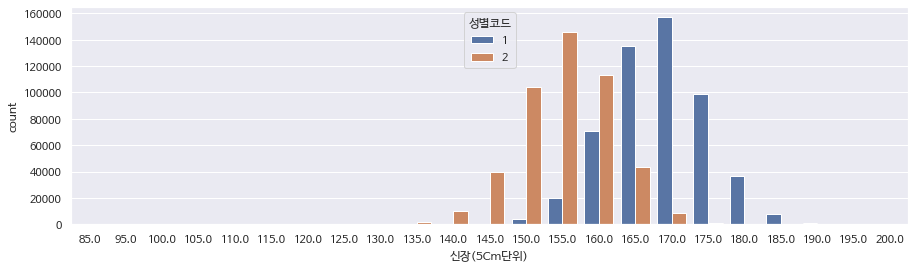

In [34]:
plt.figure(figsize = (15,4))
sns.countplot(data = df, x = "신장(5Cm단위)", hue = "성별코드")

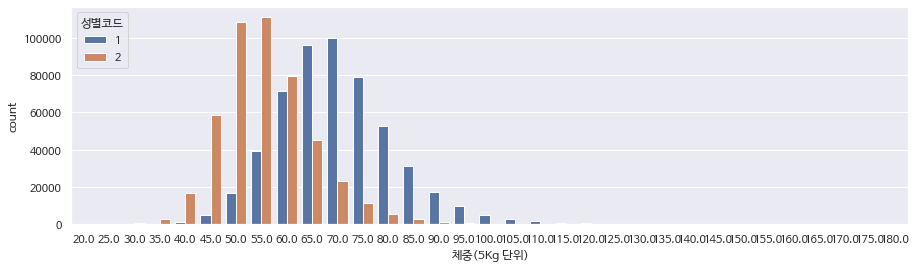

In [35]:
plt.figure(figsize = (15,4))
sns.countplot(data = df, x = "체중(5Kg 단위)", hue = "성별코드")

#### barplot - 수치형 vs 범주형 데이터 시각화

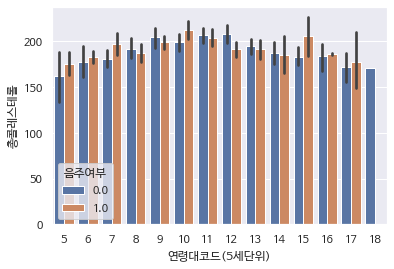

In [36]:
sns.barplot(data = df_sample, x = "연령대코드(5세단위)", y = "총콜레스테롤", hue = "음주여부" )

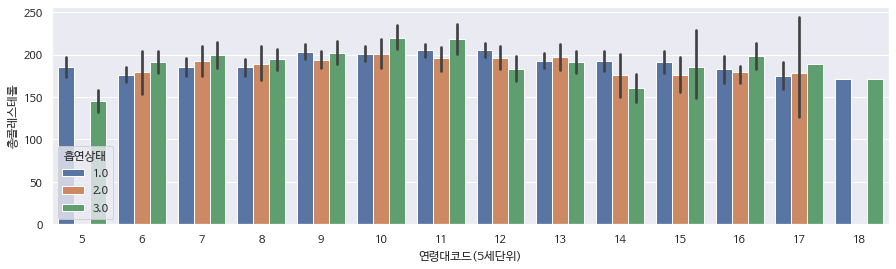

In [38]:
plt.figure(figsize = (15,4))
sns.barplot(data = df_sample, x = "연령대코드(5세단위)", y = "총콜레스테롤", hue = "흡연상태" )

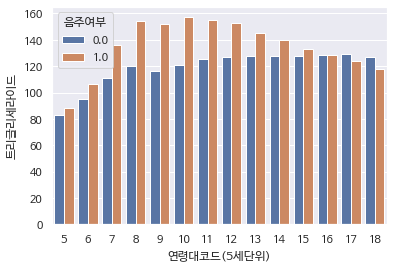

In [46]:
# ci : 신뢰구간
sns.barplot(data = df, x = "연령대코드(5세단위)", y = "트리글리세라이드", hue = "음주여부", ci = None)

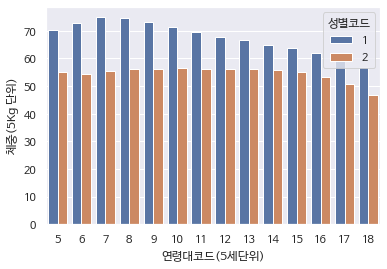

In [47]:
sns.barplot(data = df, x = "연령대코드(5세단위)", y = "체중(5Kg 단위)", hue = "성별코드", ci = None)

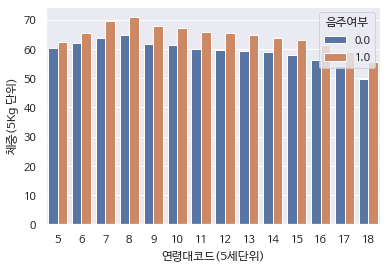

In [48]:
sns.barplot(data = df, x = "연령대코드(5세단위)", y = "체중(5Kg 단위)", hue = "음주여부", ci = None)

#### lineplot and pointplot

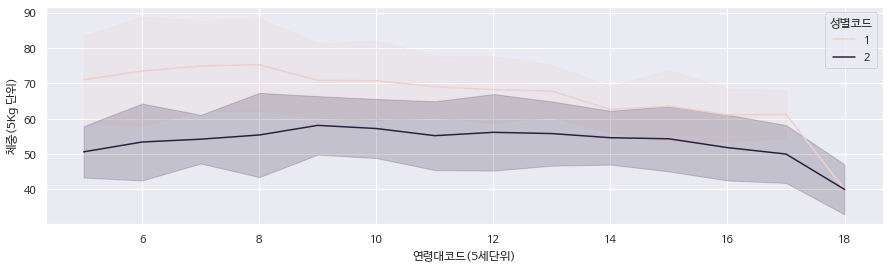

In [52]:
plt.figure(figsize = (15,4))
sns.lineplot(data = df_sample, x = "연령대코드(5세단위)", y = "체중(5Kg 단위)", hue = "성별코드", ci = "sd")

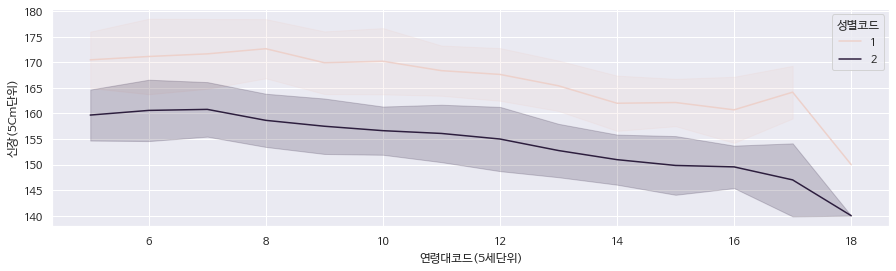

In [53]:
plt.figure(figsize = (15,4))
sns.lineplot(data = df_sample, x = "연령대코드(5세단위)", y = "신장(5Cm단위)", hue = "성별코드", ci = "sd")

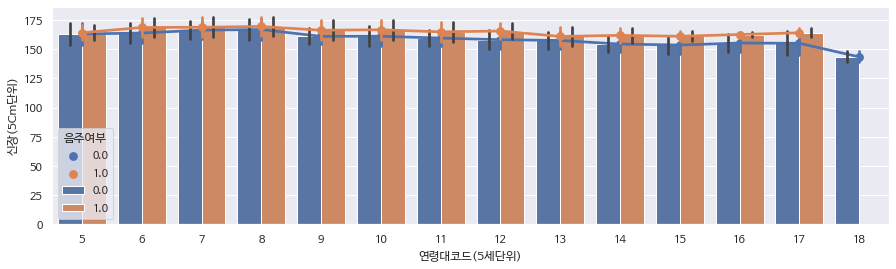

In [56]:
plt.figure(figsize = (15,4))
sns.barplot(data = df_sample, x = "연령대코드(5세단위)", y = "신장(5Cm단위)", hue = "음주여부", ci = "sd")
sns.pointplot(data = df_sample, x = "연령대코드(5세단위)", y = "신장(5Cm단위)", hue = "음주여부", ci = "sd")

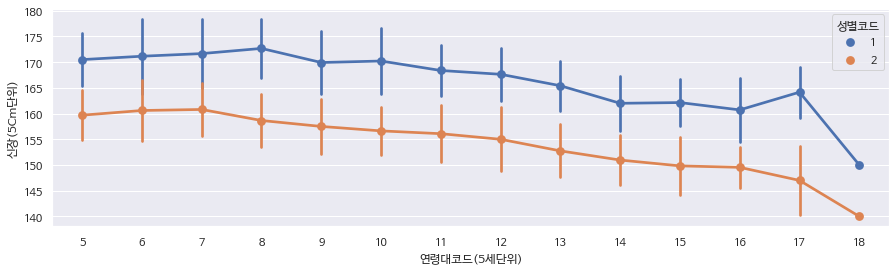

In [58]:
plt.figure(figsize = (15,4))
sns.pointplot(data = df_sample, x = "연령대코드(5세단위)", y = "신장(5Cm단위)", hue = "성별코드", ci = "sd")

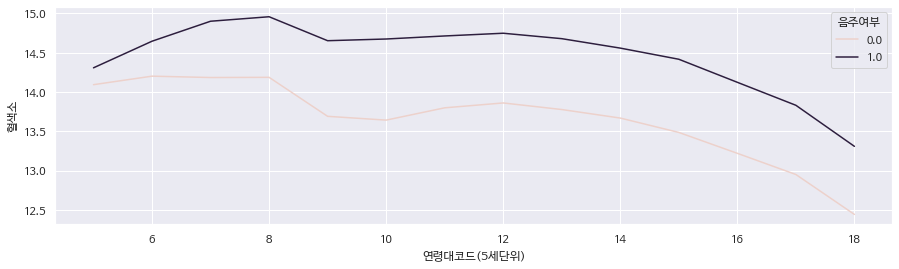

In [61]:
plt.figure(figsize = (15,4))
sns.lineplot(data = df, x = "연령대코드(5세단위)", y = "혈색소", hue = "음주여부", ci = None)

#### boxplot

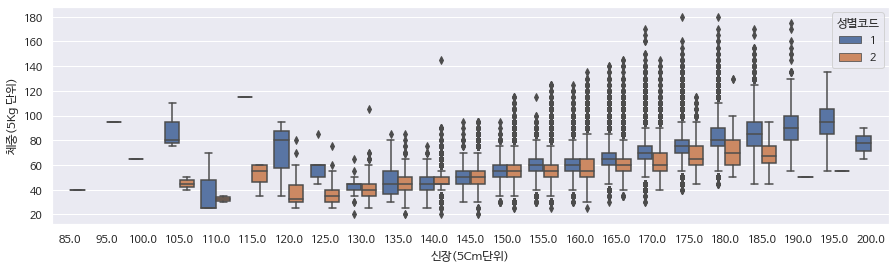

In [66]:
plt.figure(figsize = (15,4))
sns.boxplot(data = df, x = "신장(5Cm단위)", y = "체중(5Kg 단위)", hue = "성별코드")

#### violineplot

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


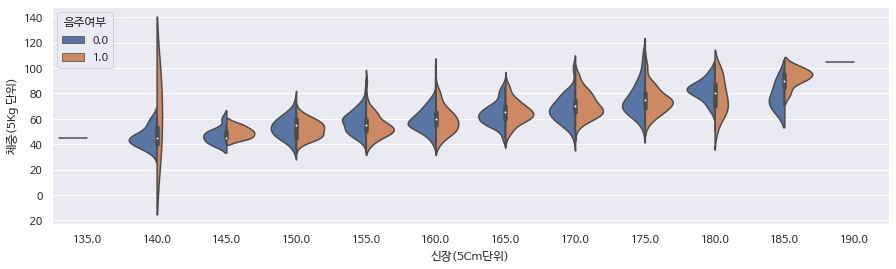

In [74]:
plt.figure(figsize = (15,4))
sns.violinplot(data = df_sample, x = "신장(5Cm단위)", y = "체중(5Kg 단위)", hue = "음주여부", split = True)

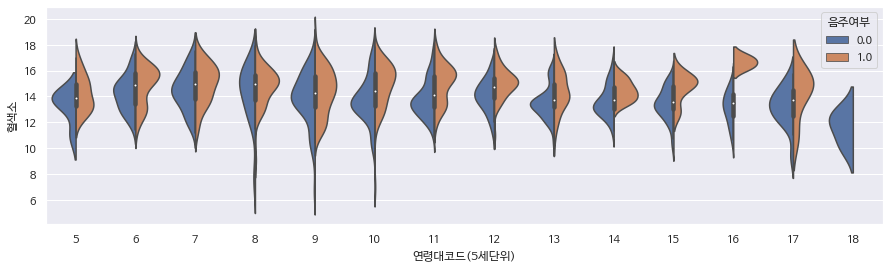

In [76]:
plt.figure(figsize = (15,4))
sns.violinplot(data = df_sample, x = "연령대코드(5세단위)", y = "혈색소", hue = "음주여부", split = True)

#### swarm plot

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 48.0% of the points cannot be placed; y

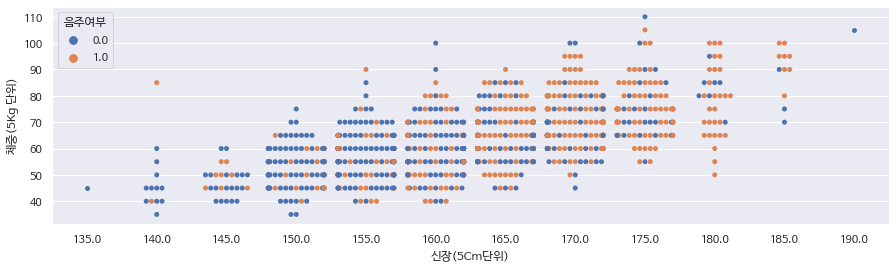

In [81]:
plt.figure(figsize = (15,4))
sns.swarmplot(data = df_sample, x = "신장(5Cm단위)", y = "체중(5Kg 단위)", hue = "음주여부")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


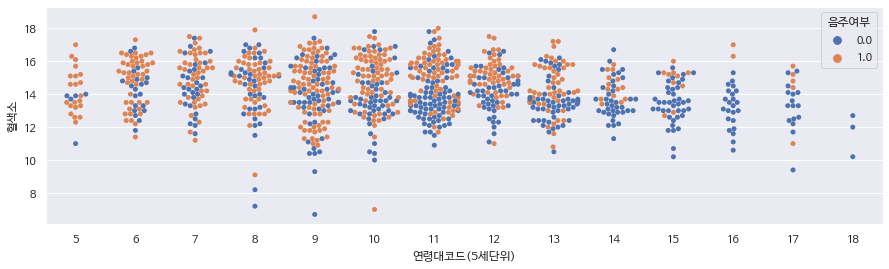

In [82]:
plt.figure(figsize = (15,4))
sns.swarmplot(data = df_sample, x = "연령대코드(5세단위)", y = "혈색소", hue = "음주여부")

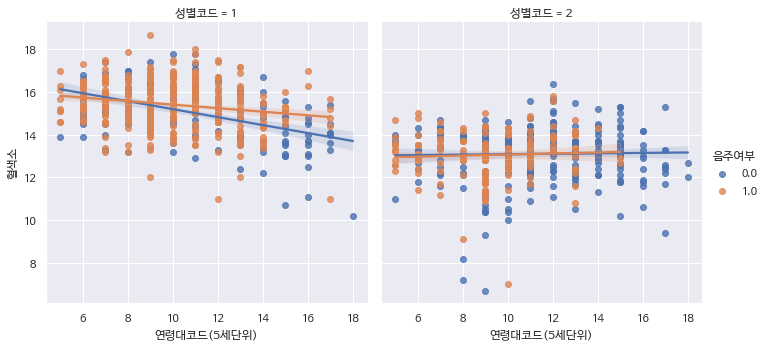

In [87]:
# lmplot
sns.lmplot(data = df_sample, x = "연령대코드(5세단위)", y = "혈색소", hue = "음주여부", col = "성별코드")